In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os 


import tensorflow as tf 

2022-06-11 22:03:27.276072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-11 22:03:27.276093: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv( os.path.join('data', 'moore.csv'), header=None).values
X = np.expand_dims(data[:,0],1)
Y = data[:,1]

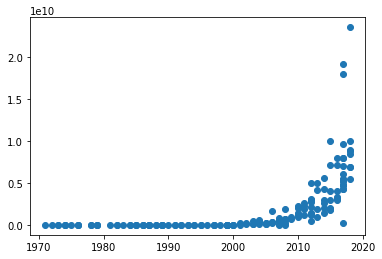

In [3]:
plt.scatter(X,Y)

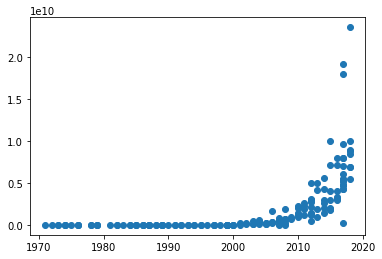

In [4]:
y = np.log(Y)
plt.scatter(X,Y)

In [5]:
X = X - X.mean()

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,)),
  # tf.keras.layers.Dense(1)
])
model.compile( optimizer=tf.keras.optimizers.SGD(0.0001, 0.9), loss='mse', metrics=['mae'])

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001 
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r = model.fit(X,y, epochs=200, callbacks=[scheduler])

Epoch 1/200


2022-06-11 22:03:30.539033: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-11 22:03:30.539056: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zalven-Nitro-AN515-55): /proc/driver/nvidia/version does not exist
2022-06-11 22:03:30.539593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 2ms/step - loss: 406.4581 - mae: 18.0977 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 303.0123 - mae: 15.4213 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 397.3452 - mae: 17.7518 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 288.5460 - mae: 14.4163 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 265.6556 - mae: 13.2176 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 167.5810 - mae: 11.6242 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 173.1623 - mae: 10.1388 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 104.3264 - mae: 8.7409 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 185.9080 - mae: 11.6829 - lr: 0.0010
Epoch 10/200
6/6 [=======================

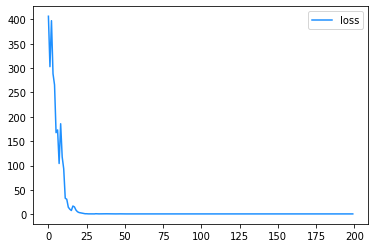

In [7]:
plt.plot(r.history['loss'], label='loss', c='dodgerblue')
plt.legend();

In [8]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.347243]], dtype=float32), array([17.768797], dtype=float32)]


In [15]:
a = model.layers[0].get_weights()[0][0,-1]
a

0.347243

In [16]:
print("Time to double : ", np.log(2)/a)

Time to double :  1.9961443675086445


In [17]:
X_c = np.array(X).flatten()
Y_c = np.array(Y)
denominator = X_c.dot(X_c) - X.mean() * X.sum()
a = ( X_c.dot(Y_c) - Y_c.mean() * X_c.sum() ) / denominator
b = ( Y_c.mean() * X_c.dot(X_c) - X_c.mean() * X_c.dot(Y_c) ) / denominator
print(a,b)
print('Time to double : ', np.log(2)/a)

151472092.07068992 2103686087.1728287
Time to double :  4.576071876240166e-09
